In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FormatStrFormatter
import numpy as np
import seaborn as sns
import matplotlib.cm as cm

In [2]:
dir_name = {
    'no_neg':'without hard',
    '1neg':'1 hard negative',
    '3neg':'3 hard negative'
}

In [ ]:
base_path = f'./wandb_data_point/loss/{dir_name["3neg"]}/base.csv'
train_base_path = ''
base_df = pd.read_csv(base_path)
train_base_df = pd.read_csv(train_base_path)

non_base_path = f'./wandb_data_point/loss/{dir_name["3neg"]}/nonbase.csv'
train_non_base_path = ''
non_base_df = pd.read_csv(non_base_path)
train_non_base_df = pd.read_csv(train_non_base_path)


In [52]:
base_df.columns

Index(['Step',
       'ScopeEnhancedDualEncoder-with_hard_neg_base_all_negs - valid_total_loss',
       'ScopeEnhancedDualEncoder-with_hard_neg_base_all_negs - valid_total_loss__MIN',
       'ScopeEnhancedDualEncoder-with_hard_neg_base_all_negs - valid_total_loss__MAX'],
      dtype='object')

In [53]:
non_base_df.columns.to_list()

['Step',
 'ScopeEnhancedDualEncoder-with_hard_neg_granularity3_scope_aware_all_negs - valid_total_loss',
 'ScopeEnhancedDualEncoder-with_hard_neg_granularity3_scope_aware_all_negs - valid_total_loss__MIN',
 'ScopeEnhancedDualEncoder-with_hard_neg_granularity3_scope_aware_all_negs - valid_total_loss__MAX',
 'ScopeEnhancedDualEncoder-with_hard_neg_granularity5_scope_aware_all_negs - valid_total_loss',
 'ScopeEnhancedDualEncoder-with_hard_neg_granularity5_scope_aware_all_negs - valid_total_loss__MIN',
 'ScopeEnhancedDualEncoder-with_hard_neg_granularity5_scope_aware_all_negs - valid_total_loss__MAX',
 'ScopeEnhancedDualEncoder-with_hard_neg_granularity5_cls_all_negs - valid_total_loss',
 'ScopeEnhancedDualEncoder-with_hard_neg_granularity5_cls_all_negs - valid_total_loss__MIN',
 'ScopeEnhancedDualEncoder-with_hard_neg_granularity5_cls_all_negs - valid_total_loss__MAX',
 'ScopeEnhancedDualEncoder-with_hard_neg_granularity3_cls_all_negs - valid_total_loss',
 'ScopeEnhancedDualEncoder-with_h

In [54]:
base_col = 'ScopeEnhancedDualEncoder-with_hard_neg_base_all_negs - valid_total_loss'
use_cols = [
    'ScopeEnhancedDualEncoder-with_hard_neg_granularity3_cls_all_negs - valid_total_loss',
    'ScopeEnhancedDualEncoder-with_hard_neg_granularity3_scope_aware_all_negs - valid_total_loss',
    'ScopeEnhancedDualEncoder-with_hard_neg_granularity5_cls_all_negs - valid_total_loss',
    'ScopeEnhancedDualEncoder-with_hard_neg_granularity5_scope_aware_all_negs - valid_total_loss',
]

In [ ]:
def plot(non_base_df,base_df,base_col,use_cols,type='loss',withhard=True,hard_num=1):


    
    
    col_names = [
        'Granularity-3 cls',
        'Granularity-3 Category Wsum',
        'Granularity-5 cls',
        'Granularity-5 Category Wsum',
    ]
    
    x_label = 'epoch'  # ← 改成你資料中代表 x 軸的欄位
    if type == 'Loss':
        y_label = 'loss'   # ← 改成你資料中代表 y 軸的欄位
    else:
        y_label = 'accuracy'

    
    
    # 繪製曲線圖
    plt.figure(figsize=(10, 6))
    plt.plot(list(range(1,len(base_df[base_col])+1)),base_df[base_col],marker='o', linestyle='-',label='baseline')

    distinct_colors = ['#ff7f0e', '#2ca02c', '#9467bd', '#8c564b']
    for idx, (use_col, col_name) in enumerate(zip(use_cols, col_names)):
        color = distinct_colors[idx % len(distinct_colors)]
        step = list(range(1, len(non_base_df[use_col]) + 1))
        plt.plot(step, non_base_df[use_col], marker='o', linestyle='-', label=col_name, color=color)
        
    if withhard:
        
        plt.title(f'Validation {type} Curve ({hard_num} Hard Negative Sample)',fontsize=14)
    else:
        plt.title(f'Validation {type} Curve (No Hard Negative Sample)',fontsize=14)
        
    if type == 'Loss':
        plt.gca().yaxis.set_major_locator(MultipleLocator(0.5))

    """3hard neg 才需要加以下兩行"""
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
    # plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.02))
    
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [32]:
type_name = {
    'mrr':'MRR@3',
    'loss':'Loss',
    'topk':'Top-3 Accuracy'
}

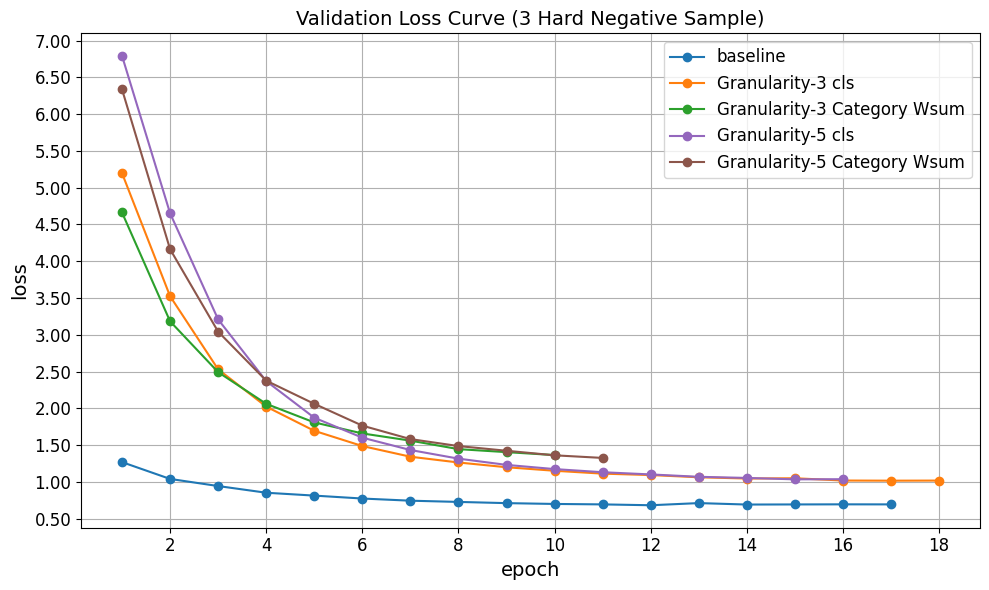

In [58]:
plot(non_base_df,base_df,base_col,use_cols,type=type_name['loss'],withhard=True,hard_num=3)

In [19]:
def plotv2(non_base_df,use_cols,type='loss',withhard=True):

    col_names = [
        'Granularity-3 Category Wavg',
        'Granularity-3 cls',
        'Granularity-5 Category Wavg',
        'Granularity-5 cls'
    ]
    
    x_label = 'epoch'  # ← 改成你資料中代表 x 軸的欄位
    if type == 'Loss':
        y_label = 'loss'   # ← 改成你資料中代表 y 軸的欄位
    else:
        y_label = 'accuracy'

    # 繪製曲線圖
    plt.figure(figsize=(10, 6))
    # plt.plot(list(range(1,len(base_df[base_col])+1)),base_df[base_col],marker='o', linestyle='-',label='baseline')
    for use_col,col_name in zip(use_cols,col_names):
        step = list(range(1,len(non_base_df[use_col])+1))
        plt.plot(step,non_base_df[use_col], marker='o', linestyle='-',label=col_name)
    if withhard:
        
        plt.title(f'With Negative-Validation {type} Curve',fontsize=14)
    else:
        plt.title(f'Without Negative-Validation {type} Curve',fontsize=14)
    if type == 'Loss':
        plt.gca().yaxis.set_major_locator(MultipleLocator(0.5))
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

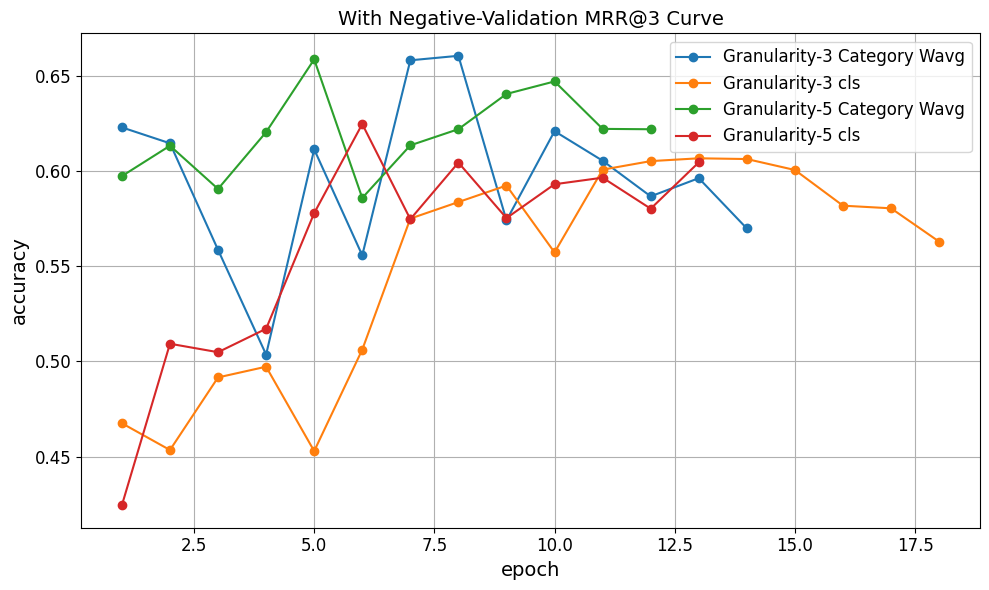

In [20]:
plotv2(non_base_df,use_cols,type='MRR@3',withhard=True)